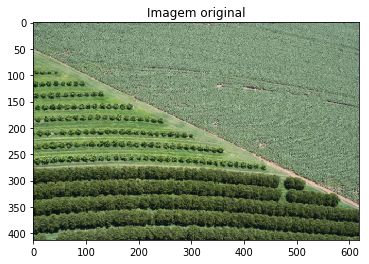

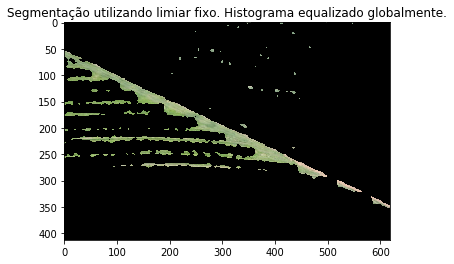

In [39]:
# ==========================================================
# Importação das bibliotecas necessárias
# ==========================================================

import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt


# Para ler mais de uma img, utilize um vetor e um laço for
# for i in range(1,[numero de imgs])
#     imagem[muero de imgs] = cv2.imread([nome da img i])
img = cv2.imread('teste.png')

# linhas = número de linhas
# colunas = número de colunas
# C = número de canais de cor da imagem
linhas, colunas, C = img.shape

# ==========================================================
# Separa os canais de cor
# ==========================================================

# Lembrando que no openCV, os canais de cores são BGR e n RGB
B = img[:,:,0] # BLUE
G = img[:,:,1] # GREEN
R = img[:,:,2] # RED

copiaG = G # cria uma copia do canal verde

# ==========================================================
# Histograma
# ==========================================================

# Função calcHist para calcular o histograma
histograma = cv2.calcHist([img], [0], None, [256], [0, 256])

# Equaliza o histograma;
heq = cv2.equalizeHist(copiaG)

# Aumento do contraste

# Cria um objeto do tipo CLAHE
#claheObj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#clahe = claheObj.apply(copiaG)

# ==========================================================
# Suavização
# ==========================================================
suaveGauss = cv2.GaussianBlur(heq, ( 13, 13), 0)
#suaveGauss = cv2.GaussianBlur(clahe, ( 13, 13), 0)

# ==========================================================
# Limiarização
# ==========================================================
# Limiarização com limiar fixo em 220
(T, bin) = cv2.threshold(suaveGauss, 200, 255, cv2.THRESH_BINARY)

resultado = cv2.bitwise_and(copiaimg,copiaimg,mask = bin)

# ==========================================================
# PLOT
# ==========================================================

plt.title("Imagem original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Segmentação utilizando limiar fixo. Histograma equalizado globalmente.")
plt.imshow(cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB))
plt.show()

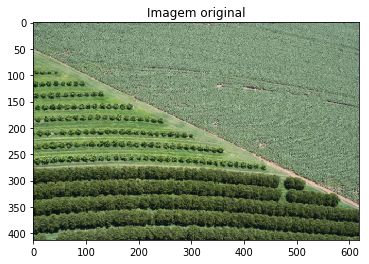

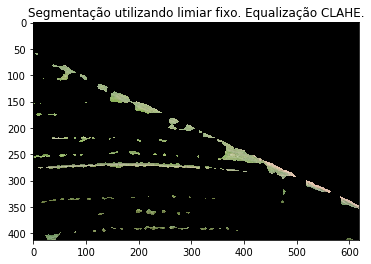

In [40]:
# ==========================================================
# Importação das bibliotecas necessárias
# ==========================================================
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('teste.png')

linhas, colunas, C = img.shape

# ==========================================================
# Separa os canais de cor
# ==========================================================
B = img[:,:,0] # BLUE
G = img[:,:,1] # GREEN
R = img[:,:,2] # RED

copiaG = G # cria uma copia do canal verde

# ==========================================================
# Histograma
# ==========================================================
# Cria um objeto do tipo CLAHE
claheObj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = claheObj.apply(copiaG)

# ==========================================================
# Suavização
# ==========================================================
suaveGauss = cv2.GaussianBlur(clahe, ( 13, 13), 0)

# ==========================================================
# Limiarização
# ==========================================================
# Limiarização com limiar fixo em 220
(T, bin) = cv2.threshold(suaveGauss, 200, 255, cv2.THRESH_BINARY)

resultado = cv2.bitwise_and(copiaimg,copiaimg,mask = bin)

# ==========================================================
# PLOT
# ==========================================================

plt.title("Imagem original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Segmentação utilizando limiar fixo. Equalização CLAHE.")
plt.imshow(cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB))
plt.show()

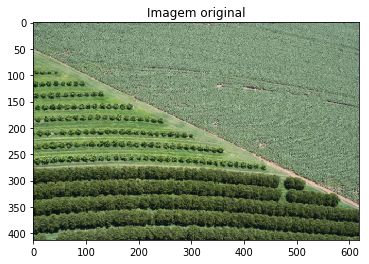

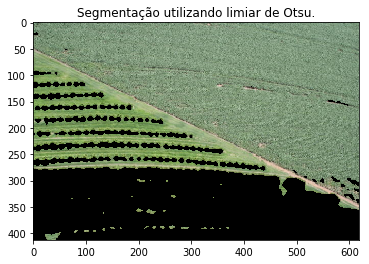

In [42]:
# ==========================================================
# Importação das bibliotecas necessárias
# ==========================================================
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('teste.png')

linhas, colunas, C = img.shape

# ==========================================================
# Separa os canais de cor
# ==========================================================
B = img[:,:,0] # BLUE
G = img[:,:,1] # GREEN
R = img[:,:,2] # RED

copiaG = G # cria uma copia do canal verde

# ==========================================================
# Histograma
# ==========================================================
histograma = cv2.calcHist([img], [0], None, [256], [0, 256])

# Equaliza o histograma;
heq = cv2.equalizeHist(copiaG)

# ==========================================================
# Suavização
# ==========================================================
suaveGauss = cv2.GaussianBlur(heq, ( 13, 13), 0)

# ==========================================================
# Limiarização
# ==========================================================
# Limiarização utilizando o método de Otsu
T = mahotas.thresholding.otsu(suaveGauss)
otsu = suaveGauss.copy()
# Transforma regiões que sejam maiores que o threshold de otsu em branco
otsu[otsu > T] = 255
# Transforma regiões que sejam menores que o threshold de otsu em preto
otsu[otsu < 255] = 0

resultado = cv2.bitwise_and(img,img,mask = otsu)

# ==========================================================
# PLOT
# ==========================================================

plt.title("Imagem original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Segmentação utilizando limiar de Otsu.")
plt.imshow(cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB))
plt.show()

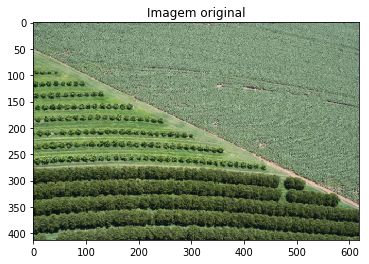

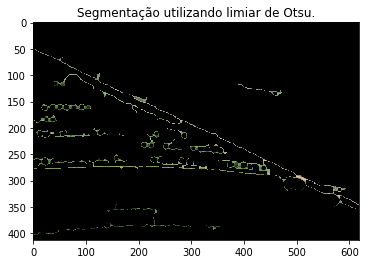

In [59]:
# ==========================================================
# Importação das bibliotecas necessárias
# ==========================================================
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('teste.png')

linhas, colunas, C = img.shape

# ==========================================================
# Separa os canais de cor
# ==========================================================
B = img[:,:,0] # BLUE
G = img[:,:,1] # GREEN
R = img[:,:,2] # RED

copiaG = B # cria uma copia do canal verde

# ==========================================================
# Histograma
# ==========================================================
histograma = cv2.calcHist([img], [0], None, [256], [0, 256])

# Equaliza o histograma;
heq = cv2.equalizeHist(copiaG)

# ==========================================================
# Suavização
# ==========================================================
suaveGauss = cv2.GaussianBlur(heq, ( 13, 13), 0)

# ==========================================================
# Detecção de Bordas
# ==========================================================
canny = cv2.Canny(suaveGauss, 1, 180)

# ==========================================================
# Fechamento
# ==========================================================
fech = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
resultado = cv2.bitwise_and(img,img,mask = fech)

# ==========================================================
# PLOT
# ==========================================================

plt.title("Imagem original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Segmentação utilizando limiar de Otsu.")
plt.imshow(cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB))
plt.show()

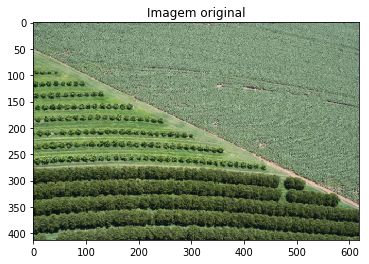

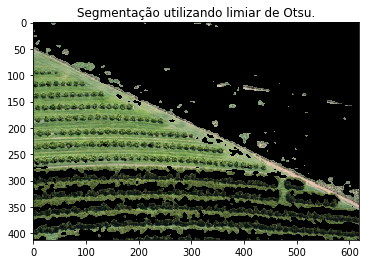

In [81]:
# ==========================================================
# Importação das bibliotecas necessárias
# ==========================================================
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('teste.png')

linhas, colunas, C = img.shape

# ==========================================================
# Separa os canais de cor
# ==========================================================
B = img[:,:,0] # BLUE
G = img[:,:,1] # GREEN
R = img[:,:,2] # RED

for i in range(linhas):
    for j in range(colunas):
        copiaGG[i,j] = np.uint8(np.absolute(0.441*np.float64(R[i,j]) - 0.811*np.float64(G[i,j]) + 0.385*np.float64(B[i,j]) + 18.787))

copiaG=np.uint8(cv2.normalize(copiaGG, None, 0, 255, cv2.NORM_MINMAX))

# ==========================================================
# Histograma
# ==========================================================
histograma = cv2.calcHist([img], [0], None, [256], [0, 256])

# Equaliza o histograma;
heq = cv2.equalizeHist(copiaG)

# Cria um objeto do tipo CLAHE
#claheObj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#clahe = claheObj.apply(copiaG)

# ==========================================================
# Suavização
# ==========================================================
suaveGauss = cv2.GaussianBlur(heq, ( 13, 13), 0)

# ==========================================================
# Limiarização
# ==========================================================
# Limiarização utilizando o método de Otsu
T = mahotas.thresholding.otsu(suaveGauss)
otsu = suaveGauss.copy()
# Transforma regiões que sejam maiores que o threshold de otsu em branco
otsu[otsu > T] = 255
# Transforma regiões que sejam menores que o threshold de otsu em preto
otsu[otsu < 255] = 0

resultado = cv2.bitwise_and(img,img,mask = otsu)

# ==========================================================
# PLOT
# ==========================================================

plt.title("Imagem original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Segmentação utilizando limiar de Otsu.")
plt.imshow(cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB))
plt.show()

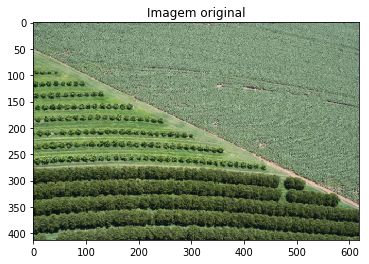

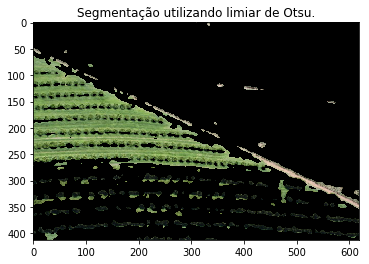

In [82]:
# ==========================================================
# Importação das bibliotecas necessárias
# ==========================================================
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('teste.png')

linhas, colunas, C = img.shape

# ==========================================================
# Separa os canais de cor
# ==========================================================
B = img[:,:,0] # BLUE
G = img[:,:,1] # GREEN
R = img[:,:,2] # RED

for i in range(linhas):
    for j in range(colunas):
        copiaGG[i,j] = np.uint8(np.absolute(0.441*np.float64(R[i,j]) - 0.811*np.float64(G[i,j]) + 0.385*np.float64(B[i,j]) + 18.787))

copiaG=np.uint8(cv2.normalize(copiaGG, None, 0, 255, cv2.NORM_MINMAX))

# ==========================================================
# Histograma
# ==========================================================
#histograma = cv2.calcHist([img], [0], None, [256], [0, 256])

# Equaliza o histograma;
#heq = cv2.equalizeHist(copiaG)

# Cria um objeto do tipo CLAHE
claheObj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = claheObj.apply(copiaG)

# ==========================================================
# Suavização
# ==========================================================
suaveGauss = cv2.GaussianBlur(clahe, ( 13, 13), 0)

# ==========================================================
# Limiarização
# ==========================================================
# Limiarização utilizando o método de Otsu
T = mahotas.thresholding.otsu(suaveGauss)
otsu = suaveGauss.copy()
# Transforma regiões que sejam maiores que o threshold de otsu em branco
otsu[otsu > T] = 255
# Transforma regiões que sejam menores que o threshold de otsu em preto
otsu[otsu < 255] = 0

resultado = cv2.bitwise_and(img,img,mask = otsu)

# ==========================================================
# PLOT
# ==========================================================

plt.title("Imagem original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Segmentação utilizando limiar de Otsu.")
plt.imshow(cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB))
plt.show()

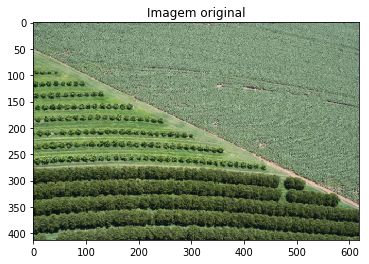

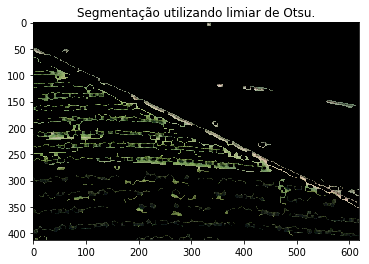

In [85]:
# ==========================================================
# Importação das bibliotecas necessárias
# ==========================================================
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('teste.png')

linhas, colunas, C = img.shape

# ==========================================================
# Separa os canais de cor
# ==========================================================
B = img[:,:,0] # BLUE
G = img[:,:,1] # GREEN
R = img[:,:,2] # RED

for i in range(linhas):
    for j in range(colunas):
        copiaGG[i,j] = np.uint8(np.absolute(0.441*np.float64(R[i,j]) - 0.811*np.float64(G[i,j]) + 0.385*np.float64(B[i,j]) + 18.787))

copiaG=np.uint8(cv2.normalize(copiaGG, None, 0, 255, cv2.NORM_MINMAX))

# ==========================================================
# Histograma
# ==========================================================
# Cria um objeto do tipo CLAHE
claheObj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = claheObj.apply(copiaG)

# ==========================================================
# Suavização
# ==========================================================
sigma = 13
suaveGauss = cv2.GaussianBlur(clahe, ( sigma, sigma), 0)

# ==========================================================
# Detecção de Bordas
# ==========================================================
canny = cv2.Canny(suaveGauss, 20, 120)

# ==========================================================
# Fechamento
# ==========================================================
fech = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
resultado = cv2.bitwise_and(img,img,mask = fech)

# ==========================================================
# PLOT
# ==========================================================

plt.title("Imagem original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Segmentação utilizando limiar de Otsu.")
plt.imshow(cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
# ==========================================================
# Importação das bibliotecas necessárias
# ==========================================================
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Ortho-DroneMapper.tif')

downSampling = img.copy()
downSamplingA = [downSampling]

for i in range(3):
    downSampling = cv2.pyrDown(downSampling)
    downSamplingA.append(downSampling)
    
linhas, colunas, C = downSampling.shape

# ==========================================================
# Separa os canais de cor
# ==========================================================
B = downSampling[:,:,0] # BLUE
G = downSampling[:,:,1] # GREEN
R = downSampling[:,:,2] # RED

copiaGG = np.zeros((linhas, colunas), dtype=int)

for i in range(linhas):
    for j in range(colunas):
        copiaGG[i,j] = np.uint8(np.absolute(0.441*np.float64(R[i,j]) - 0.811*np.float64(G[i,j]) + 0.385*np.float64(B[i,j]) + 18.787))

copiaG = np.uint8(cv2.normalize(copiaGG, None, 0, 255, cv2.NORM_MINMAX))

# ==========================================================
# Histograma
# ==========================================================
# Cria um objeto do tipo CLAHE
claheObj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = claheObj.apply(copiaG)

# ==========================================================
# Suavização
# ==========================================================
sigma = 13
suaveGauss = cv2.GaussianBlur(clahe, ( sigma, sigma), 0)

# ==========================================================
# Detecção de Bordas
# ==========================================================
canny = cv2.Canny(suaveGauss, 20, 120)

# ==========================================================
# Fechamento
# ==========================================================
fech = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
print(linhas)
print(colunas)
plt.imshow(fech)
plt.show()

resultado = cv2.bitwise_and(downSampling,downSampling,mask = fech)

cv2.imwrite('cannyVSortho.png',resultado)
# ==========================================================
# PLOT
# ==========================================================

plt.title("Imagem original")
plt.imshow(cv2.cvtColor(downSampling,cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Segmentação utilizando limiar de Otsu.")
plt.imshow(cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB))
plt.show()

1473
2053


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
# ==========================================================
# Importação das bibliotecas necessárias
# ==========================================================
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Ortho-DroneMapper.tif')
    
linhas, colunas, C = img.shape

print(linhas)
print(colunas)

# ==========================================================
# Separa os canais de cor
# ==========================================================
B = img[:,:,0] # BLUE
G = img[:,:,1] # GREEN
R = img[:,:,2] # RED

copiaGG = np.zeros((linhas, colunas), dtype=int)

for i in range(linhas):
    for j in range(colunas):
        copiaGG[i,j] = np.uint8(np.absolute(0.441*np.float64(R[i,j]) - 0.811*np.float64(G[i,j]) + 0.385*np.float64(B[i,j]) + 18.787))

copiaG = np.uint8(cv2.normalize(copiaGG, None, 0, 255, cv2.NORM_MINMAX))

#copiaG = G

# ==========================================================
# Histograma
# ==========================================================
# Cria um objeto do tipo CLAHE
claheObj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = claheObj.apply(copiaG)

# ==========================================================
# Suavização
# ==========================================================
sigma = 13
suaveGauss = cv2.GaussianBlur(clahe, ( sigma, sigma), 0)

# ==========================================================
# Limiarização
# ==========================================================
# Limiarização utilizando o método de Otsu
T = mahotas.thresholding.otsu(suaveGauss)
otsu = suaveGauss.copy()
# Transforma regiões que sejam maiores que o threshold de otsu em branco
otsu[otsu > T] = 255
# Transforma regiões que sejam menores que o threshold de otsu em preto
otsu[otsu < 255] = 0

resultado = cv2.bitwise_and(img,img,mask = otsu)

cv2.imwrite('otsuVSortho.png',resultado)
# ==========================================================
# PLOT
# ==========================================================

plt.title("Imagem original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Segmentação utilizando limiar de Otsu.")
plt.imshow(cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB))
plt.show()

11782
16423


KeyboardInterrupt: 

In [4]:
# ==========================================================
# Importação das bibliotecas necessárias
# ==========================================================
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('plant4.jpg')

linhas, colunas, C = img.shape

# ==========================================================
# Separa os canais de cor
# ==========================================================
B = img[:,:,0] # BLUE
G = img[:,:,1] # GREEN
R = img[:,:,2] # RED

copiaGG = np.zeros((linhas, colunas), dtype=int)

for i in range(linhas):
    for j in range(colunas):
        copiaGG[i,j] = np.uint8(np.absolute(0.441*np.float64(R[i,j]) - 0.811*np.float64(G[i,j]) + 0.385*np.float64(B[i,j]) + 18.787))

copiaG = np.uint8(cv2.normalize(copiaGG, None, 0, 255, cv2.NORM_MINMAX))

# ==========================================================
# Histograma
# ==========================================================
# Cria um objeto do tipo CLAHE
claheObj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = claheObj.apply(copiaG)

# ==========================================================
# Suavização
# ==========================================================
sigma = 13
suaveGauss = cv2.GaussianBlur(clahe, ( sigma, sigma), 0)

# ==========================================================
# Limiarização
# ==========================================================
# Limiarização utilizando o método de Otsu
T = mahotas.thresholding.otsu(suaveGauss)
otsu = suaveGauss.copy()
# Transforma regiões que sejam maiores que o threshold de otsu em branco
otsu[otsu > T] = 255
# Transforma regiões que sejam menores que o threshold de otsu em preto
otsu[otsu < 255] = 0

# ==========================================================
# Detecção de Bordas
# ==========================================================
canny = cv2.Canny(suaveGauss, 50, 150)

# ==========================================================
# Aplicação das Hough Lines
# ==========================================================
imgHough = img.copy()

rho = 1
theta = np.pi / 180
limiar = 150
minTam = 25
maxGap = 250

lines = cv2.HoughLinesP(canny, rho, theta, limiar, np.array([]),
                    minTam, maxGap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(imgHough,(x1,y1),(x2,y2),(255,0,0),2)

# ==========================================================
# Fechamento
# ==========================================================
fech = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
resultado = cv2.bitwise_and(img,img,mask = fech)

# ==========================================================
# PLOT
# ==========================================================

plt.title("Imagem original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.gray()
plt.title("Detecção de bordas.")
plt.imshow(canny)
plt.show()

plt.title("Segmentação utilizando Otsu.")
plt.imshow(cv2.cvtColor(cv2.bitwise_and(img,img,mask = otsu),cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Segmentação utilizando Canny e fechamento.")
plt.imshow(cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Hough lines")
plt.imshow(cv2.cvtColor(imgHough,cv2.COLOR_BGR2RGB))
plt.show()

TypeError: 'NoneType' object is not iterable